In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import initdirs

In [2]:
import cv2
import numpy as np
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes import compgraph
from visioncg import cbcalib

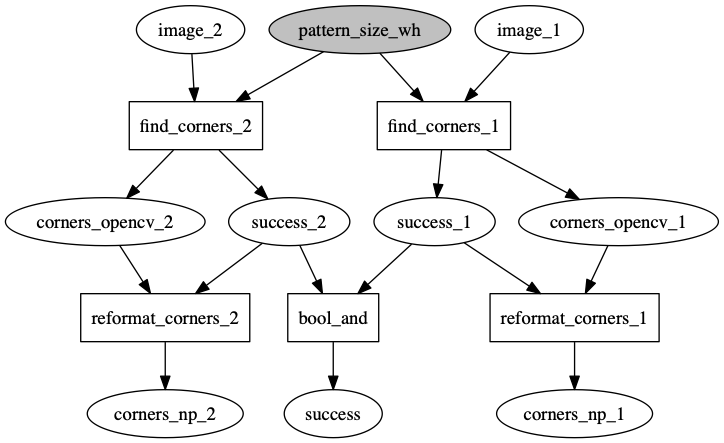

In [4]:
psize = (15, 9)

cg_corners_stereo = compgraph.graph_union_with_suffixing(
    cbcalib.CGFindCorners(),
    cbcalib.CGFindCorners(),
    exclude=['pattern_size_wh']
)

cg_corners_stereo = compgraph.add_new_vertices(
    cg_corners_stereo,
    {'bool_and': lambda a, b: a and b},
    {'bool_and': (('success_1', 'success_2'), 'success')}
)


runner = compgraph.CompGraphRunner(
    cg_corners_stereo,
    frozen_tokens={'pattern_size_wh': psize}
)

nxpd.draw(runner.to_networkx())